# Implementing YOLO11 for Real-time Weapon Detection
___

Developed by Muhammad Arkana Yudhistira

**Table of Contents**

1. [Background](#0)
2. [Introduction to Object Detection](#1)
3. [Working with YOLO11](#2)
4. [Weapon Detection with YOLO11 Model](#3)
5. [Real World Applications](#4)

In [1]:
from ultralytics import YOLO
from PIL import Image
import pandas as pd
import numpy as np
import os
import cv2

# Background <a id="0" ></a>

The increasing crime rate has caused public safety to be increasingly worrying. Therefore, innovative solutions are needed to improve security and ensure public peace of mind. This project is designed to apply one of the advanced machine learning techniques, **Object Detection**, and use them to solve real-world problems. By exploring YOLO11 (You Only Look Once), an object detection algorithm known for its incredible speed and accuracy, we will explore and implement a system capable of detecting crime in a variety of situations.

# Introduction to Object Detection <a id="1" ></a>

As the development of **computer vision** technology advances, the ability of computers to understand the visual world has been better than ever. One of the most fundamental and versatile applications in computer vision is **image classification**, where a system can learn to identify an image to be classified into one or more categories.

However, now computer vision has developed even further. In addition to recognizing what objects are in an image, it can also determine the location and size of the object. This task can be done by the **object detection** algorithm. Object detection identifies the location of an object by predicting the **bounding box**, a box that encloses the detected object in an image.


![Object Detection](https://deeplobe.ai/wp-content/uploads/2023/06/Object-detection-Real-world-applications-and-benefits.png)

## Object Detection vs Image Classification 

Object detection and image classification are two computer vision tasks that are often thought to be similar, but actually have significant differences. Here are the differences between the two tasks:

|              | Image Classification                         | Object Detection                                          |
|--------------|----------------------------------------------|-----------------------------------------------------------|
| Objective    | Classify the entire image            | Identify the location and classify objects in the image |
| Output       | Categorical labels                               | Categorical labels and bounding boxes coordinates                 |
| Target       | 1 categories                                   | Multiple categories                                           |
| Complexity   | Simpler, faster computation time | More complex, slower computation time              |
| Model        | CNN, ResNet, VGG, Inception                  | YOLO, Faster R-CNN, SSD                                   |

## Object Detection with YOLO Algorithm

YOLO (You Only Look Once) is a popular object detection algorithm due to its speed and accuracy, allowing real-time object detection. YOLO has a method that allows for object prediction and bounding box prediction simultaneously. This is different from other algorithms that make repeated predictions to obtain the desired object location in the image. The following are the stages of how the YOLO algorithm works:
    
![YOLO Algorithm](https://i.ibb.co/xJYTnvT/yolo-algorithm.png)

1. **Input Image to YOLO Model**

	The image to be predicted is given to the YOLO algorithm which consists of CNN (Convolutional Neural Network) architecture. YOLO will learn the features contained in the input image.

2. **Grid Prediction**

	YOLO divides the image into grid cells with the number S×S. Then, each grid cell will make a bounding box prediction. The prediction made is a prediction of the object in the image section of each grid.

3. **Remove Predictions with Low Confidence**

	Each prediction generated by each grid will have a confidence score value which is the probability value of a bounding box containing a certain type of object. Bounding boxes with a confidence score below the threshold (default: 0.25) will be discarded.

4. **Non-Max Suppression (NMS)**

	In the remaining bounding boxes, there is a possibility that an object is predicted several times by different grids, resulting in overlap between bounding boxes. **NMS** is used to remove redundant bounding boxes on the same object by only keeping the box with the highest confidence score (measured by **Intersection over Union** or **IoU**).

5. **Final Output**

	The result of this process is a set of bounding boxes, each of which has a class label and confidence score. These bounding boxes are the final predictions of the YOLO algorithm for objects in the new image.

# Working with YOLO11 <a id="2" ></a>

YOLO11 is the latest version of YOLO from Ultralytics. As the latest model, YOLO11 improves on previous versions, introduces new features, and improves performance and efficiency. Here is the documentation of YOLO from Ultralytics: https://docs.ultralytics.com/

We can import the `YOLO` algorithm from the ultralytics library.

In [1]:
from ultralytics import YOLO

## YOLO11 Model Preparation

YOLO11 provides a variety of **pre-trained models** with different sizes and capabilities, tailored to specific usage needs, ranging from applications that require high speed with a small sacrifice in accuracy, to applications that require high accuracy without considering a larger computational burden. **Pre-trained models** are models that have been trained to learn from very large amounts of data.

Here is a comparison of the available YOLO11 model input options:

| Model      | mAP (50-95) | Speed - CPU (ms) | Speed - GPU (ms) |
|------------|-------------|------------------|------------------|
| yolo11n.pt | 39.5        | 56.1             | 1.5              |
| yolo11s.pt | 47.0        | 90.0             | 2.5              |
| yolo11m.pt | 51.5        | 183.2            | 4.7              |
| yolo11l.pt | 53.4        | 238.6            | 6.2              |
| yolo11x.pt | 54.7        | 462.8            | 11.3             |

📝 **Note**: `.pt` is a file extension of **PyTorch**, a library specializing in machine learning that can be used to create and save a model.

We will try to use the `yolo11m.pt` model as input to the YOLO algorithm and then we will save it in the `model_detection` variable.

In [2]:
model_detection = YOLO("yolo11m.pt")

## Image Object Detection

We will try to do object detection on an image using our imported model.

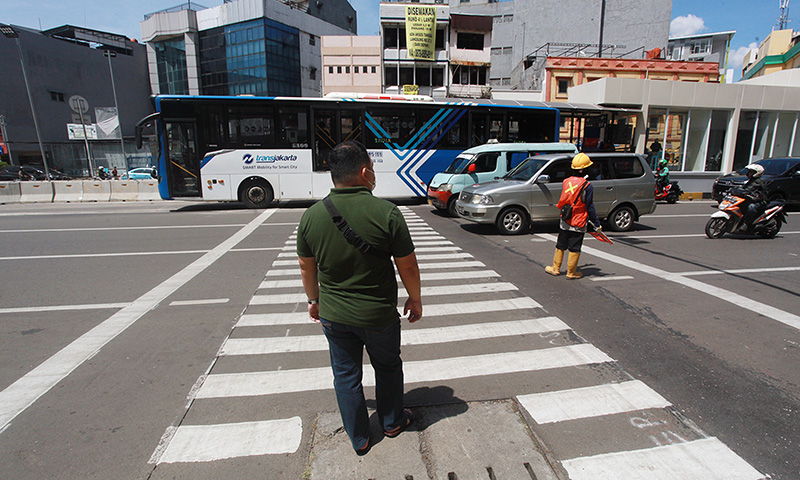

In [3]:
from PIL import Image

Image.open("data_input/zebra_cross_jkt.jpg")

### Image Prediction

To perform object detection, we can use the `.predict()` method and provide input in the form of a `source` of the media we want to predict.

🔻 Here are the source options that we can input:

- Image: `"/path_image/image.jpg"`
- Video: `"/path_video/video.mp4"`
- ​​Webcam (OpenCV): `cv2.VideoCapture(0)`
- URL: `"www.image.com/image.jpg"`
- YouTube: `"www.youtube.com/watch?v=videoyoutube"`


In [4]:
result = model_detection.predict(source = "data_input/zebra_cross_jkt.jpg") 


image 1/1 g:\My Drive\Algoritma-G\RnD\Academy 2.0 Material\article_yolo11\data_input\zebra_cross_jkt.jpg: 384x640 6 persons, 6 cars, 3 motorcycles, 1 bus, 1 handbag, 302.6ms
Speed: 4.7ms preprocess, 302.6ms inference, 9.4ms postprocess per image at shape (1, 3, 384, 640)


The output of the model prediction is a list containing the attributes of the `result` variable for each predicted image. 

### Prediction Result Visualization

To interpret the prediction results on the image, we will visualize the `result`. The `.plot()` method visualizes the object detection results by assigning bounding boxes, labels, and confidence scores to the image. The `.plot()` method returns the visualized image as an `array`.

In [5]:
result_array = result[0].plot()

We can use the `Image.fromarray()` function to display an image from an `array`.

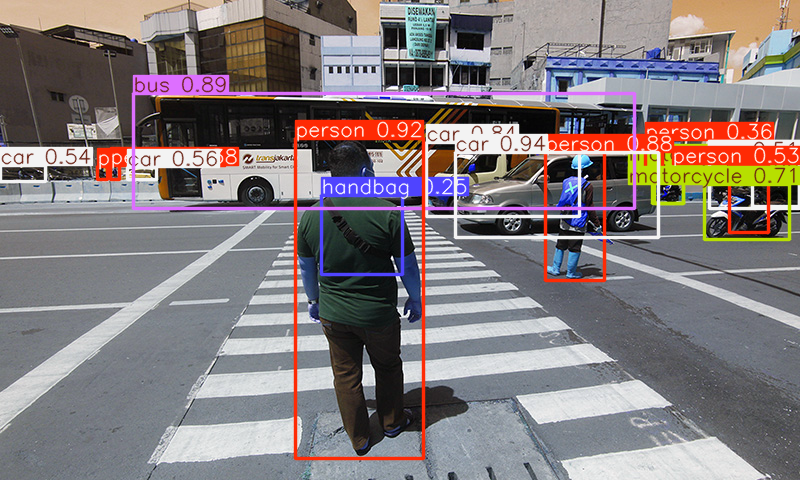

In [ ]:
# Show image from array
Image.fromarray(result_array)

However, we can see that the visualized image has unnatural colors. This happens because the pixel format in the array generated by the `.plot()` method is in **BGR** color format, while the visualized format is **RGB**.

So, we need to convert the **BGR** format to **RGB** with the help of the **OpenCV** (`cv2`) library

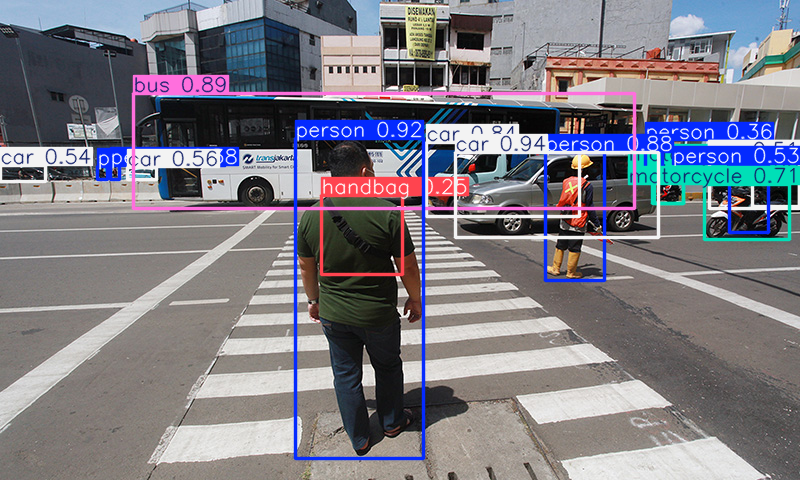

In [7]:
import cv2

result_rgb = cv2.cvtColor(result_array, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
Image.fromarray(result_rgb)  # RGB Image

### Working with Prediction Results

To perform further analysis of the prediction results, we can utilize the attributes of `result`. The `.boxes` attribute can be used to obtain various characteristics of the bounding box formed, such as:

- `cls`: Class labels for each bounding box
- `conf`: Confidence score values ​​for each bounding box
- `xywh`: Coordinates of the bounding box in the image

In [ ]:
# Keep the boxes attributes from the predicted image
boxes = result[0].boxes

We can use the `len()` function to calculate how many predicted bounding boxes there are.

In [17]:
len(boxes)

16

To display the respective number of detected objects, we can get the class labels for each bounding box using the `.boxes.cls` attribute.

In [9]:
# Displays detected classes from prediction results.
classes = result[0].boxes.cls
classes

tensor([ 2.,  0.,  5.,  0.,  2.,  3.,  2.,  2.,  0.,  2.,  2.,  0.,  0.,  3.,  3.,  0., 26.])

Then, to calculate the number, we can do the following steps:

1. Change the `classes` variable to a pandas Series with the `.tolist()` method and the `pd.Series()` function
2. Replace the label numbers with their names with the `.replace()` method
3. Count the number of each unique label using the `.value_counts()` method

In [11]:
import pandas as pd

pd.Series(classes.tolist()).replace(model_detection.names).value_counts()

car           6
person        6
motorcycle    3
bus           1
handbag       1
Name: count, dtype: int64

### Detecting Specific Classes

The `classes=[<label_number>]` parameter in the `predict()` method can be used to select specific object labels to be detected from the image. Below is an example to perform object detection for people and cars in the `zebra_cross_jkt_jpg` image:

In [13]:
result_peoplecar = model_detection.predict(source = "data_input/zebra_cross_jkt.jpg",
                                           classes = [0, 2]) # People dan Car


image 1/1 g:\My Drive\Algoritma-G\RnD\Academy 2.0 Material\article_yolo11\data_input\zebra_cross_jkt.jpg: 384x640 6 persons, 6 cars, 230.7ms
Speed: 1.7ms preprocess, 230.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


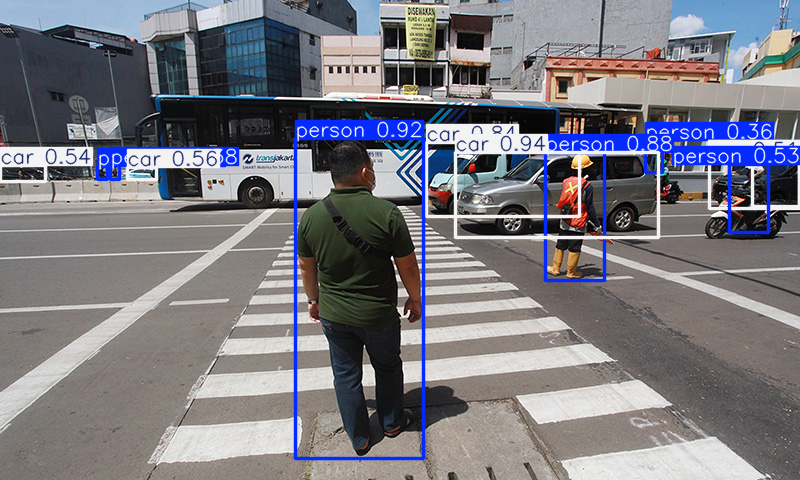

In [ ]:
Image.fromarray(cv2.cvtColor(result_peoplecar[0].plot(), cv2.COLOR_BGR2RGB))

## Video Object Detection

A video is basically a series of images, called **frames**, played in sequence to create movement. When we make predictions on a video, we are actually making predictions on several images in the form of frames.

If we want to do object detection on a video, there are several parameters of the `.predict()` method that need to be used:

- `source`: Determines the data source for object detection
- `stream`: Makes predictions while processing `results` simultaneously
- `save`: Saves the video output with detected objects that have been given a bounding box
- `classes`: Selects the label of the specific object to be detected from the video

In [15]:
result_video = model_detection.predict(source = "data_input/office.mp4",
                                       stream = True,
                                       save = True,
                                       classes = [0]) # People

The `result_video` variable stores the results of the video detection that has been inputted in the form of an Object that can be processed in the next stage using **looping**.

In [ ]:
# displayed to a specific frame
frame_list = []

for frame in result_video:
    frame_list.append(frame)

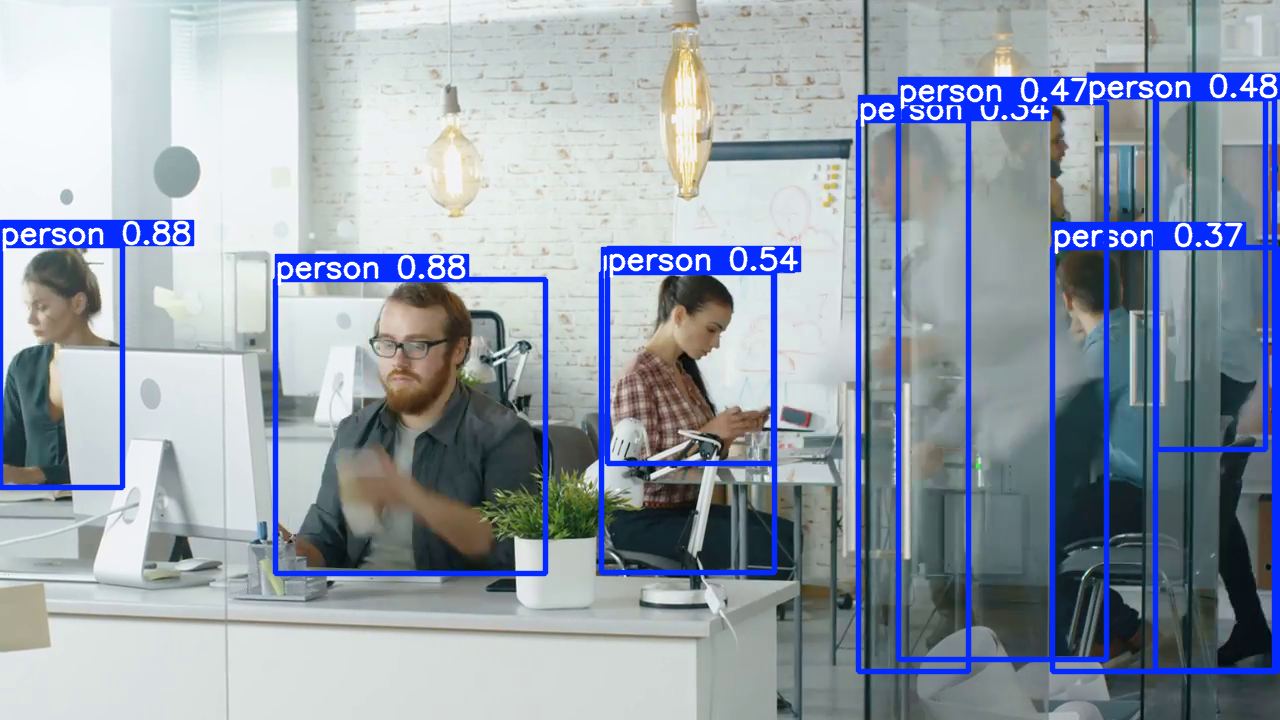

In [17]:
# Displays the predicted image from the 200th frame of the video.
Image.fromarray(cv2.cvtColor(frame_list[200].plot(), cv2.COLOR_BGR2RGB))

# Study Case: Weapon Detection with YOLO11 Model <a id="3" ></a>

The implementation of object detection to detect weapons in videos or images is a very important and relevant case study, especially in the context of improving security and preventing crime. We will implement YOLO11 to perform weapon detection.

## Dataset Preparation

YOLO11 requires a collection of images labeled with bounding boxes to train an object detection model. We will use a tool called **Roboflow** to help us prepare the dataset. Roboflow is a platform that simplifies the process of creating datasets and computer vision models.

🌐 Roboflow Website: https://roboflow.com/

### Option 1: Image Collection using Roboflow Universe

Roboflow Universe provides a collection of open source datasets for computer vision. We will use these tools to obtain object detection datasets in the form of images that have been labeled with bounding boxes. Here are the steps to prepare a dataset through Roboflow Universe:

1. Open the Roboflow Universe website via https://universe.roboflow.com/
2. Search for the dataset you want to search for in the search bar
3. Select the dataset that best matches the object you want to detect (check the image quality, number of images and available classes)
4. Select `Download Dataset` to download the desired dataset
5. Change **Format** export to **YOLO11** to adjust the dataset format to one that can be accepted by YOLO11
6. Select **download zip to computer** to download the process in zip format
7. The dataset will be downloaded to our computer.

### Option 2: Image Annotation using Roboflow Project

**Roboflow Project** provides various tools for annotating/labeling images that we upload, image preprocessing, and adjusting the dataset format to the model that we will use. By performing image annotation through Roboflow Project, we can create custom datasets that are not publicly available. Here are the steps to prepare a dataset through Roboflow Project:

1. Open the Roboflow Project website via https://app.roboflow.com/.
2. Create a new project via `+ Create New Project`, give the project a name in **Project Name**, the classes you want to detect in **Annotation Group**, and select **Object Detection** in **Project Type**.
3. After the project has been created, there are various tools available in the sidebar of the project page.
4. In the `Upload Data` menu, upload the images that you want to use as a dataset then select **Save and Continue**.
5. Select **Start Manual Labeling** and select **Assign Images** to start the image annotation process (we can work together with colleagues to do the annotation).
6. Annotate/label the image on the `Annotate` menu, select **Start Annotating** then provide the appropriate bounding box and label for each uploaded image.
7. After annotating, select `Add images to Dataset`. We will be given the option to distribute the image to **Train**, **Valid**, and **Test**, please set it according to the desired proportion and select **Add Images**.
8. To check the collection of images that have been annotated, select the `Dataset` menu.
9. Select the `Generate` menu to create a dataset. We can do further **preprocessing** stages and **augmentation** processes if needed. Select **Create** to complete the dataset creation process.
10. To download the dataset to our computer, select the `Versions` menu and select **Export Dataset**.
11. Change **Format** export to **YOLO11** to adjust the dataset format to be accepted by YOLO11
12. Select **download zip to computer** to download in zip format
13. The dataset will be downloaded to our computer.

### Weapon Detection Dataset

The dataset format accepted by YOLO11 has the following data structure:

```markdown
📁 weapon
├── 📁 training
|   ├── 📁 images
|   |   ├── 🖼️ image1.jpg
|   |   ├── 🖼️ image2.jpg
|   |   └── ...
|   └── 📁 labels
|       ├── 📝 image1.txt
|       ├── 📝 image2.txt
|       └── ...
├── 📁 validation
|   ├── 📁 images
|   |   ├── 🖼️ image3.jpg
|   |   ├── 🖼️ image4.jpg
|   |   └── ...
|   └── 📁 labels
|       ├── 📝 image3.txt
|       ├── 📝 image4.txt
|       └── ...
└── 📝 data.yaml
```

where :

- The `image.jpg` file is the image that will be studied by the model
- The `image.txt` file is a text containing the bounding box coordinates and object labels in the image with the same name
- The `data.yaml` file is a file that stores the directory location of the training and validation folders, and stores the names of the stored classes.

Here is the code to display the number of images in the `training/images` and `validation/images` folders in the `weapon` dataset that we will use:

In [2]:
import os

train_path = "data_input/weapon/training/images"
train_list = os.listdir(train_path)
print("Training Images: ", len(train_list))

val_path = "data_input/weapon/validation/images"
val_list = os.listdir(val_path)
print("Validation Images: ", len(val_list))

Training Images:  936
Validation Images:  235


## Model Training

After all the data preparation processes are complete, we will then carry out the training process to train our model to be able to identify objects that are `knife` or `handgun` weapons.

First, we will initialize the creation of the model using `yolo11m.pt`. The reason we use `yolo11m.pt` is to carry out the **Transfer Learning** process, where we "transfer" the knowledge that YOLO has learned on a very large dataset to learn the new data that we will provide. Here are the advantages of using the transfer learning process:

1. Saving time and resources
2. Ease of learning datasets with small numbers
3. Significant increase in accuracy

In [3]:
model_weapon = YOLO("yolo11m.pt") 

To perform the training process, we can use the `.train()` method which has the following parameters:

- `data`: Shows the location of the `data.yaml` file containing the dataset configuration for training
- `epochs`: Sets the number of epochs/iterations/repetitions for the training process.
- `imgsz`: Sets the size of the input image during training.

In [ ]:
results = model_weapon.train(data="data_input/weapon/data.yaml",
                             epochs=5,
                             imgsz=640)

## Custom Model Evaluation

YOLO stores training results in files in the `runs` folder. One of the files that we can analyze to see the performance of our object detection model is the `results.csv` file. We can open this file with the help of the `pd.read_csv()` function from **pandas**.

In [8]:
evaluation = pd.read_csv('runs/detect/train/results.csv')
evaluation

epoch        train/box_loss        train/cls_loss  \
0                     1                1.0702                2.0563   
1                     2                1.3677                1.9692   
2                     3                1.3911                1.9748   
3                     4                1.2926                1.7735   
4                     5                1.1582                1.6278   

         train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                1.4428               0.30052               0.39496   
1                1.6775               0.21914               0.17180   
2                1.6869               0.26418               0.37848   
3                1.6035               0.46542               0.45065   
4                1.5064               0.60728               0.61660   

       metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
0               0.23454               0.07564                2.1621   
1               0.13043               0.04329                2.2375   
2               0.22584               0.08690                1.9938   
3               0.41831               0.22837                1.5821   
4               0.63478               0.42706                1.2524   

           val/cls_loss          val/dfl_loss                lr/pg0  \
0                9.6255                3.1808              0.000546   
1               22.0730                3.6510              0.000884   
2                4.0118                2.6640              0.001001   
3                2.8274                2.0830              0.000677   
4                1.6265                1.6697              0.000347   

                 lr/pg1                lr/pg2  
0              0.000546              0.000546  
1              0.000884              0.000884  
2              0.001001              0.001001  
3              0.000677              0.000677  
4              0.000347              0.000347

The dataframe shows the evolution of our model performance from the first epoch to the last. Although there are many values, we will only focus on the values ​​of `metrics/precision(B)`, `metrics/recall(B)`, and `metrics/mAP50(B)`.

### Intersection over Union (IoU)

**Intersection Over Union (IOU)** is a measure that evaluates the overlap between two bounding boxes. Using the IoU value, we can determine whether a bounding box wraps an object properly or not. By default, the minimum IoU limit is 0.7 or 70% to be considered overlapping or having a proper bounding box position.

![IoU](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2016/09/iou_equation.png?lossy=2&strip=1&webp=1)

📝 **Note**: IoU affects Confidence Score, when IoU is high, the Confidence Score will also be higher.

📝 **Note**: Positive = There is an Object

To calculate the evaluation metrics for object detection, the model calculates the True Positive, False Positive, and False Negative values ​​from the prediction results of all images.

![Object Detection Evaluation](https://miro.medium.com/v2/resize:fit:4800/format:webp/0*RCMGyG-mmNpwR66o.png)

- **True Positive (TP)** : The model detects **there is an object** and it is true **there is an object**
- **False Positive (FP)** : The model detects **there is an object**, even though **there is no object**
- **False Negative (FN)** : The model detects **there is no object**, even though **there is an object**

### Precision

**Precision** is a value that represents the performance of the model to identify whether its prediction is a relevant object or just a background. The Precision value can be obtained by calculating the ratio of **True Positive (TP)** to all **object predictions** which is denoted by:

$$Precision = \frac{TP}{TP+FP}$$

### Recall

**Recall** is a value that represents the performance of the model to identify the ground truth/object to be detected. The Recall value can be obtained by calculating the ratio of **True Positive (TP)** to all **ground truth** which is denoted by:

$$Recall = \frac{TP}{TP+FN}$$

📝**Note**:

The main difference between Precision and Recall is that Precision is influenced by the **False Positive (FP)** value which occurs due to incorrectly predicting the **background**, while Recall is influenced by the **False Negative (FN)** value which is caused by incorrectly predicting the **ground truth**.

### Mean Average Precision (mAP)

**Mean Average Precision (mAP)** is a value that combines two important aspects of object detection: how accurate the model is in detecting relevant objects (precision) and how well the model finds all the objects it should (recall). This metric is very popular to be used as the main standard for evaluating the performance of object detection models.

To calculate the mAP value, we need to calculate the average precision value at each possible recall value, from 0 to 1. To change the recall value, it can be done by modifying the confidence score threshold limit set so that the prediction can occur (by default, the value is 0.25). This value can be represented by the Precision-Curve curve as in the example below:

![Mean Average Precision (mAP)](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*GC4nLLTDq1eOP9njT6_INA.jpeg)

After successfully calculating **Average Precision (AP)**, we can obtain the mAP value by averaging the AP values ​​for all the classes we use for evaluation.

# Real-World Applications <a id="4" ></a>

We will explore how object detection can be implemented to address several real-world cases. One of the most direct applications of object detection in security is CCTV analysis. Modern surveillance systems not only passively record video but are also able to analyze the video content in real-time to detect suspicious activity, abandoned objects, or unauthorized entry into restricted areas. This allows for rapid response to security incidents and can even prevent incidents before they occur.

## Armed Robbery Detection

Object detection can be used to identify weapons used by someone to commit acts of violence recorded on CCTV. When someone is detected using a weapon, one of the things that can be done is to activate an alarm to notify security. Security can also be sent information in the form of detection time, location of the incident, and even a snapshot or short video clip of the act of violence.

In [ ]:
model_robbery = YOLO("data_input/weapon_weight.pt")

In [ ]:
result_robery = model_robbery.predict(source = "data_input/minimarket_robbery3.mp4",
                                      stream = True,
                                      save = True,
                                      conf = 0.7) 

for result in result_robery:
    print("Weapon Detected = {} \n".format(len(result.boxes)))
    
    if len(result.boxes.cls) > 0:
        print("WEAPON DETECTED!")

## Intruder Detection 

Object detection can be used to develop a burglary detection system, especially when the house is unoccupied. The system is designed to automatically recognize the presence of a stranger in the house and immediately inform the homeowner or security.

In [ ]:
model_intruder = YOLO('yolo11m.pt')

In [ ]:
result_intruder = model_intruder.predict(source = "data_input/home_robbery.mp4",
                                         classes = [0], # People
                                         stream = True,
                                         save = True) 

for result in result_intruder:
    print("People Detected = {} \n".format(len(result.boxes)))
    
    if len(result.boxes) > 0:
        print("INTRUDER DETECTED!")

## Other Applications

Ultralytics provides various applications from YOLO to complete various tasks that can be completed using object detection. For information about these applications, please refer to the following references: https://docs.ultralytics.com/guides/#real-world-projects

# Reference

- [Ultralytics YOLO Docs](https://docs.ultralytics.com/)
- [Ultralytics GitHub](https://github.com/ultralytics/ultralytics)
- [Roboflow Docs](https://docs.roboflow.com/)

